# Leren: Neural Networks and Automatic Differentiation
## 12 December

In today's lecture, we will use this notebook to help us get a better understanding of *neural networks* and implement a basic one for a regression problem. Perform the exercise in your own copy of the notebook: *File > Save a copy in Drive*

Below, we're going to import `numpy` in a slightly different way.  We are going to import it from the library [JAX](https://github.com/google/jax).  Note that you'll (probably) see the warning: `WARNING:absl:No GPU/TPU found, falling back to CPU.`  This is expected, as it just means that the operations will be run on the CPU instead of a GPU (which would be faster, but performance shouldn't be a problem for this exercise).

In [ ]:
# We going to import numpy slightly differently, from the jax library.  
# The reason for the change will be obvious later in the assignment
import jax.numpy as np
from jax import random, grad, vmap

# Some plotting libraries
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme()
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 3})

## TASK #1: Activation Functions


1. Implement the [sigmoid](#sigmoid), [hyperbolic tangent](#tanh), and  [rectified linear](#relu) activation functions and their gradients
2. Plot the [result, compare, and interpret](#compare-activations)
3. Share your insights: https://www.menti.com/al29scze3vbc

<a name='sigmoid'></a>
### Sigmoid Function

The sigmoid (a.k.a. logistic) function is defined as:

$$g(x) = \frac{1}{1 + e^{-x}} $$

**Task:** Write the function `sigmoid` that can either take a single value `X`, or an array of values `X`, and compute the *Sigmoid* function for each.  

*Hint: Numpy built-in functions and basic arithmetic operations work on both Numpy arrays and single values.*

**Task:** Write the function `grad_sigmoid` that takes a single value `X` and computes the derivative of the *Sigmoid* function.

*Hint: Use the JAX function `grad`.*

In [ ]:
def sigmoid(X):
    # X: scalar, vector, or matrix
    # return: element-wise application of the sigmoid function
    ### YOUR SOLUTION HERE
    return ??

assert sigmoid(0) == 0.5
assert sigmoid(1) == np.e / (1 + np.e)
assert np.allclose(sigmoid(np.array([0,1])), np.array([0.5, np.e / (1 + np.e)]))

### YOUR SOLUTION HERE
grad_sigmoid = ??

assert grad_sigmoid(0.) == sigmoid(0.)*(1.-sigmoid(0.))

SyntaxError: ignored

<a name='tanh'></a>
### Hyperbolic Tangent Function

The tanh function is defined as:

$$g(x) = \frac{e^{2x}-1}{e^{2x}+1} $$

**Task:** Write the function `tanh` that can either take a single value `X`, or an array of values `X`, and compute the *tanh* function for each.  

*Hint: Numpy built-in functions and basic arithmetic operations work on both Numpy arrays and single values.*

**Task:** Write the function `grad_tanh` that takes a single value `X` and computes the derivative of the *tanh* function.

*Hint: Use the JAX function `grad`.*

In [ ]:
def tanh(X):
    # X: scalar, vector, or matrix
    # return: element-wise application of the tanh function
    ### YOUR SOLUTION HERE
    return ??

assert tanh(0) == 0.
assert tanh(1) == (np.e**2-1.) / (1 + np.e**2)
assert np.allclose(tanh(np.array([0,1])), np.array([0., (np.e**2-1.) / (1 + np.e**2)]))

### YOUR SOLUTION HERE
grad_tanh = ??

assert grad_tanh(0.) == 1.-tanh(0.)**2

SyntaxError: ignored

<a name='relu'></a>
### Rectified Linear Unit Function

The ReLU function is defined as:

$$g(x) = \max(0,x) $$

**Task:** Write the function `relu` that can either take a single value `X`, or an array of values `X`, and compute the *ReLU* function for each.  

*Hint: Numpy built-in functions and basic arithmetic operations work on both Numpy arrays and single values.*


**Task:** Write the function `grad_relu` that takes a single value `X` and computes the derivative of the *ReLU* function.

*Hint: Use the JAX function `grad`.*

In [ ]:
def relu(X):
    # X: scalar, vector, or matrix
    # return: element-wise application of the relu function
    ### YOUR SOLUTION HERE
    return ??

assert relu(0) == 0
assert relu(1) == 1.
assert np.allclose(relu(np.array([0,1])), np.array([0., 1.]))

### YOUR SOLUTION HERE
grad_relu = ??

assert grad_relu(-1.) == 0.
assert grad_relu(1.) == 1.

<a name='compare-activations'></a>
### Compare Activation Functions

Here we will compare the different activation functions in terms of their function and gradient curves. I have provided scripts for producing the plots below.

**Task:** Run the cells to generate the plots and discuss with your neighbour. How do the activation functions and their gradients differ? How do you think this impacts the neural network perfomance? (training, accuracy, flexibility, ...)




In [ ]:
# Plot the functions
plt.figure(figsize=(9,6))
X = np.linspace(-3.,3.,100)
plt.plot(X, sigmoid(X), label="$\sigma(x)$")
plt.plot(X, tanh(X), label="$\mathrm{tanh}(x)$")
plt.plot(X, relu(X), label="$\mathrm{ReLU}(x)$")
plt.xlabel("$x$")
plt.legend()
plt.show()

In [ ]:
# Plot the gradients 
# Note that JAX grad-based functions expects scalar outputs, vmap solves this
# problem by applying the gradient function to each dimension of the input X.
plt.figure(figsize=(9,6))
X = np.linspace(-3.,3.,100)
plt.plot(X, vmap(grad_sigmoid)(X), label="$\\frac{\partial}{\partial x}\sigma(x)$")
plt.plot(X, vmap(grad_tanh)(X), label="$\\frac{\partial}{\partial x}\mathrm{tanh}(x)$")
plt.plot(X, vmap(grad_relu)(X), label="$\\frac{\partial}{\partial x}\mathrm{ReLU}(x)$")
plt.xlabel("$x$")
plt.legend()
plt.show()

## REGRESSION SETUP


We will consider the following simulated scalar regression problem. Run the following cell to generate the training data and visualize the regression problem.

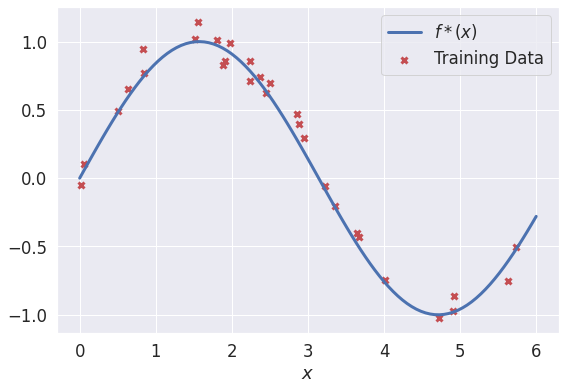

In [ ]:
def true_function(X):
    # X: scalar, vector, or matrix
    # return: f*(X)
    return np.sin(X)

N = 30
key, subkey = random.split(random.PRNGKey(0))

# Generate training data
X_train = random.uniform(key=key,shape=(N,1),minval=0,maxval=6)
Y_train = true_function(X_train) + 0.1*random.normal(key=subkey,shape=(N,1))

# Plot the true function and training data
plt.figure(figsize=(9,6))
X = np.linspace(0.,6.,100)
plt.plot(X, true_function(X), label="$f*(x)$")
plt.scatter(X_train[:], Y_train[:], marker='x', color='r', label='Training Data')
plt.xlabel("$x$")
plt.legend()
plt.show()

## TASK #2: Forward Propagation

Forward propagation consists of evaluating the output of the network $f(x_n)$ for a given datapoint $x_n$ and with $h_0 = x_n$:

$$
\begin{align}
a_l &= W_{l-1}h_{l-1}+b_{l-1}& l=1,\ldots,L  \\
h_l &= \sigma(a_l) & l=1,\ldots,L \\
f(x_n) &=W_L h_L + b_L
\end{align}
$$

where we call $a_l$ the *pre-activation*, i.e. the input to the activation function $\sigma$.

**Task:**
1. Implement forward propagation in the function `predict` below using the `relu` activation function.
2. Try a few different options of layer sizes, random seeds, noise scales for initialization and see how it affects the initial $\hat{f}(x)$.
3. What is the dimension of $f(x)$? https://www.menti.com/al29scze3vbc

In [ ]:
# A helper function to randomly initialize weights and biases
# for a dense neural network layer using a Normal(0, scale^2) distribution
def random_layer_params(m, n, key, scale=1e-1):
  w_key, b_key = random.split(key)
  return scale * random.normal(w_key, (n, m)), scale * random.normal(b_key, (n,))
# Initialize all layers for a fully-connected neural network with sizes "sizes"
def init_network_params(sizes, key, scale=1e-1):
  keys = random.split(key, len(sizes))
  return [random_layer_params(m, n, k, scale) for m, n, k in zip(sizes[:-1], sizes[1:], keys)]

# ==============================================================================
#                                 TASK
# ==============================================================================
def predict(params, inputs):
    # params: list of neural network parameters, one set W, b per layer
    # inputs: the input to the neural network X
    # return: the output of forward propagation
    for W, b in params:
        ### YOUR SOLUTION HERE
        outputs = ??
        inputs = ??
    return outputs


# Try different layer sizes, random seeds, and parameter initialization scales. 
# The first and last elements of the list correspond input and target dimensions.
### YOUR SOLUTION HERE
rnd_seed = 1
layer_sizes = [1, 10, 10, 1]
init_scale = 0.1
# ==============================================================================

# Initialize the network and setup vectorized function for prediction
init_params = init_network_params(layer_sizes, random.PRNGKey(rnd_seed), init_scale)
batched_predict = vmap(predict, in_axes=(None, 0))

# Plot the true function and training data
plt.figure(figsize=(9,6))
X = np.linspace(0.,6.,100)
batched_preds = batched_predict(init_params, X.reshape((100,1)))
plt.plot(X, true_function(X), label="$f*(x)$")
plt.plot(X, batched_preds[:], label='$\hat{f}(x)$')
plt.scatter(X_train[:], Y_train[:], marker='x', color='r', label='Training Data')
plt.xlabel("$x$")
plt.legend()
plt.show()

SyntaxError: ignored

## TASK #3: Backpropagation and Gradient Descent

To compute gradients with respect to the neural network parameters we need to be able to evaluate the loss function
$$
\ell( \{W_l,b_l\}_{l=0}^L; X, y) = \sum_{n=1}^N \|y_n-f(x_n)\|^2
$$

**Task:**
1. Implement the squared error loss function `loss` for a batch of data.

Using JAX's `grad` function applied to `loss` we get a new callable function with the same arguments as `loss` that instead outputs the *gradient* with respect to the first argument (`params`). Using automatic differentiation we can avoid deriving the gradient of `loss` by hand.

**Task:**
2. Run gradient descent for various network architecturs, step sizes, and number of iterations. Can you get a good fit to the data? How does the step size interact with the neural network architecture (layer sizes)? ...
3. Share your insights: https://www.menti.com/al29scze3vbc

In [ ]:
# ==============================================================================
#                                 TASK
# ==============================================================================
def loss(params, batch):
    # params: list of neural network parameters, one set W, b per layer
    # batch: data in batch form
    # return: squared error loss, scalar
    inputs, targets = batch
    preds = batched_predict(params, inputs)
    ### YOUR SOLUTION HERE
    return ??
# ==============================================================================

# Using JAX's grad function we get gradients of 
# loss w.r.t. the parameters
grad_loss = grad(loss)

init_params = init_network_params([1,5,1], random.PRNGKey(1))
print('Loss test: '+str(loss(init_params, (X_train, Y_train)))) # expect scalar
print('Grad test: '+str(grad_loss(init_params, (X_train,Y_train))))

SyntaxError: ignored

In [ ]:
def update(params, batch):
    # params: list of neural network parameters, one set W, b per layer
    # batch: data in batch form
    # return: updated params after one iteration of gradient descent 
    grads = grad_loss(params, batch)
    return [(w - step_size * dw, b - step_size * db)
          for (w, b), (dw, db) in zip(params, grads)]

# ==============================================================================
#                                 TASK
# ==============================================================================

### YOUR SOLUTION HERE 
# Hint: start with T small (~100) to make sure gradient descent is stable before
# you run more iterations (usually T=1000 to 5000 is sufficient) 
T = 100
layer_sizes = [1, 10, 10, 1]
step_size = 0.01

# ==============================================================================

# Initialize and run gradient descent
batched_data = (X_train, Y_train)
params = init_network_params(layer_sizes, random.PRNGKey(1))
loss_val = []
for i in range(T):
    params = update(params, batched_data)
    loss_val.append(loss(params, batched_data))

# Plot loss function
plt.figure(figsize=(9,6))
plt.plot(loss_val, label="Loss")
plt.xlabel("Iterations")
plt.ylabel('Training Error/Loss')
plt.title('Initial loss: '+str(np.round(loss_val[0],2))+
          '  /  Final loss: '+str(np.round(loss_val[-1],2)))
plt.show()

# Plot the true function, training data, and learnt function
plt.figure(figsize=(9,6))
X = np.linspace(0.,6.,100)
batched_preds = batched_predict(params, X.reshape((100,1)))
plt.plot(X, true_function(X), label="$f*(x)$")
plt.plot(X, batched_preds[:], label='$\hat{f}(x)$')
plt.scatter(X_train[:], Y_train[:], marker='x', color='r', label='Training Data')
plt.xlabel("$x$")
plt.title('Visualization')
plt.legend()
plt.show()

KeyboardInterrupt: ignored

# OBS: After the lecture before you leave, please complete the evaluation!